In [1]:
%load_ext autoreload
%autoreload 2

# from src.datasets import *
from src.datamodule import KH9CdDataModule
from main import read_rois_from_geopackage
from torchgeo.datasets.utils import BoundingBox
import torch
import matplotlib.pyplot as plt

c:\Users\Anwender\miniforge3\envs\torchgeo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
aoi_test_small = BoundingBox(119736.8306800332211424,120771.4748695194866741,487192.3094612115528435,487754.0150268116849475,0,1)


old_images_dir = 'C:/masterarbeit/raster/KH-9/amsterdam/georeferenced/'
old_images_dir = 'C:/masterarbeit/raster/KH-9/amsterdam/georeferenced/filtered'
new_images_dir = 'C:/masterarbeit/raster/aerial_images_2023'
bag_buildings_dir = 'C:/masterarbeit/vector/buildings'
experiment_name = 'nb_test'
experiment_dir = 'nb_test'
log_dir = 'C:/masterarbeit/early_fusion/logs'
batch_size = 10
patch_size = 256
learning_rate = 0.0001
num_dataloader_workers = 8
val_split_pct = 0.2
test_split_pct = 0.1
# checkpoint_name = args.checkpoint_name
rois = read_rois_from_geopackage('C:/masterarbeit/vector/dataset_splits.gpkg')
aoi = None
task = 'ChangeStarFarSeg'


## Datamodule testing

In [6]:
datamodule = KH9CdDataModule(
    old_images_dir=old_images_dir,
    new_images_dir=new_images_dir,
    bag_buildings_dir=bag_buildings_dir,
    batch_size=batch_size,
    num_workers=num_dataloader_workers,
    patch_size=patch_size,
    val_split_pct=val_split_pct,
    test_split_pct=test_split_pct,
    rois=rois,
    aoi=aoi,
)

datamodule.setup("fit")

In [ ]:
from torchgeo.datasets import unbind_samples

loader = datamodule.train_dataloader()
batch = next(iter(loader))
samples = unbind_samples(batch)
s = samples[0]

image torch.Size([2, 3, 256, 256])
mask torch.Size([2, 1, 256, 256])


In [7]:
def plot(sample: dict):
    images = sample["image"]
    image1 = images[0, 0, :, :].numpy()
    image2 = images[1].numpy().transpose(1, 2, 0)
    image2 = torch.clamp(torch.tensor(image2) / 250, min=0, max=1).numpy()

    gt_mask = sample["mask"][0, 0].numpy()  # shape: [H, W]
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image1, cmap='gray')
    axs[0].axis("off")
    axs[0].set_title("Image 1")
    axs[1].imshow(image2)
    axs[1].axis("off")
    axs[1].set_title("Image 2")
    axs[2].imshow(gt_mask, cmap="gray")
    axs[2].axis("off")
    axs[2].set_title("Ground Truth")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig


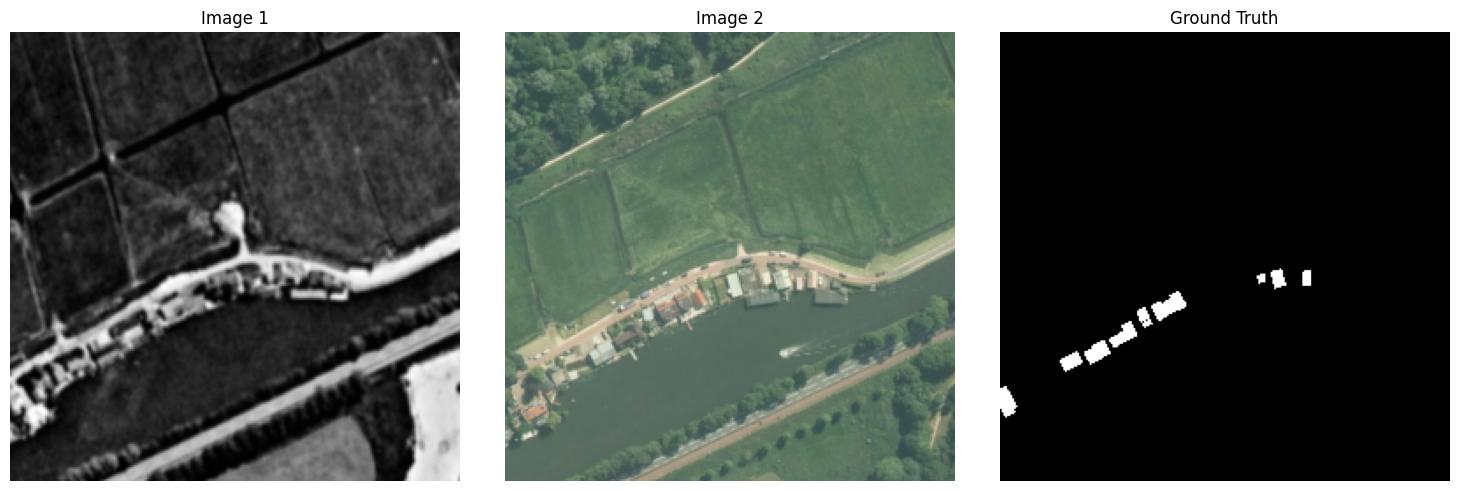

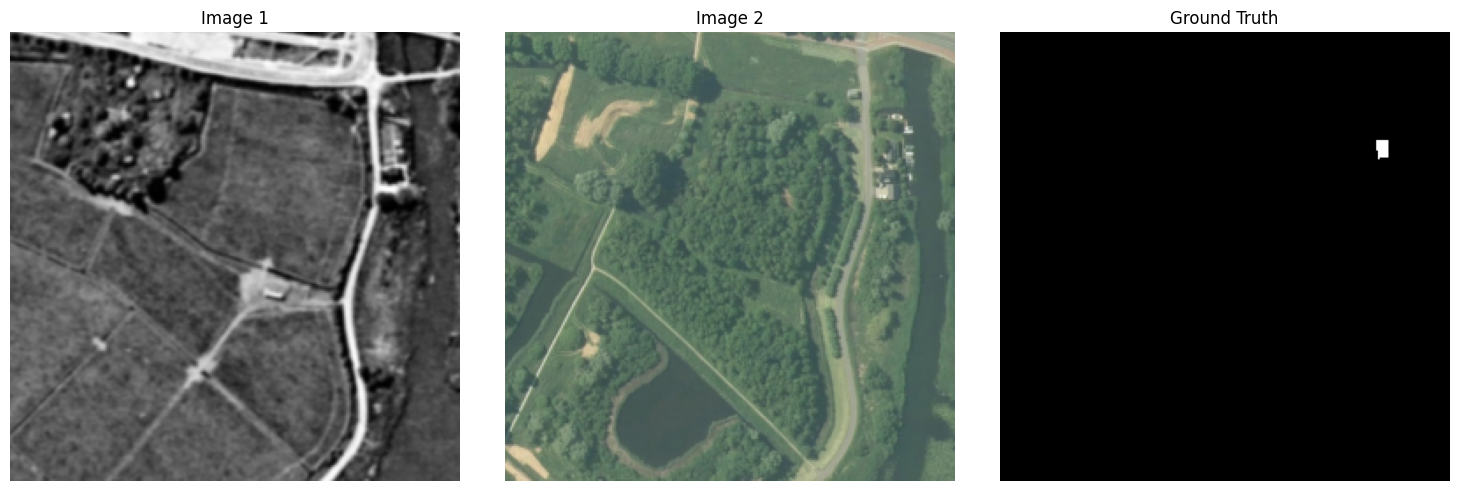

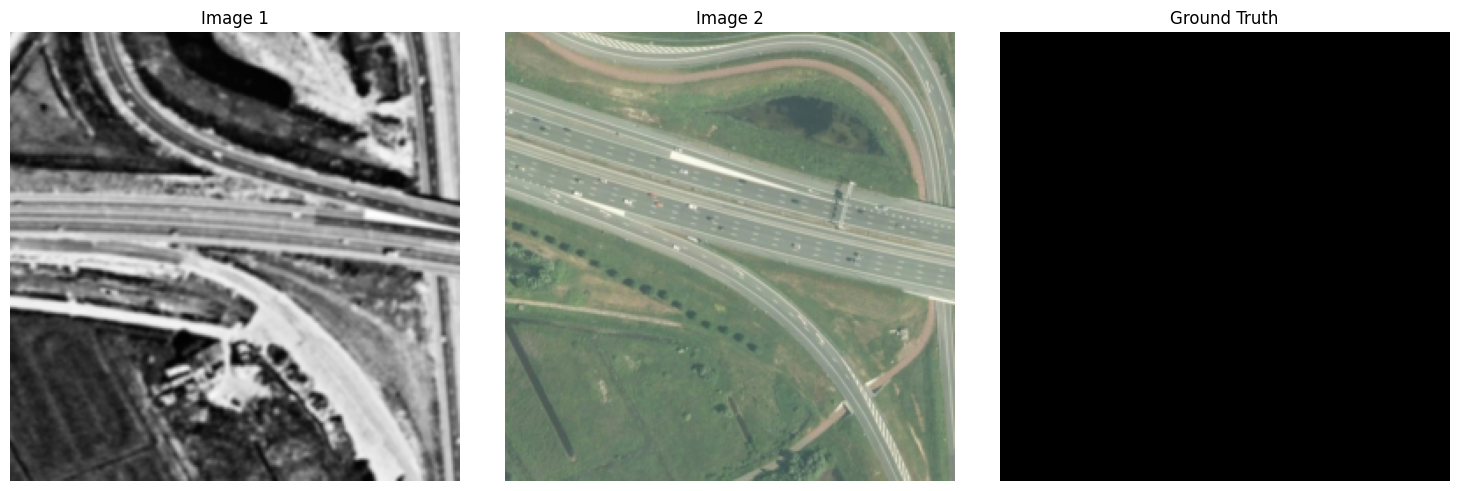

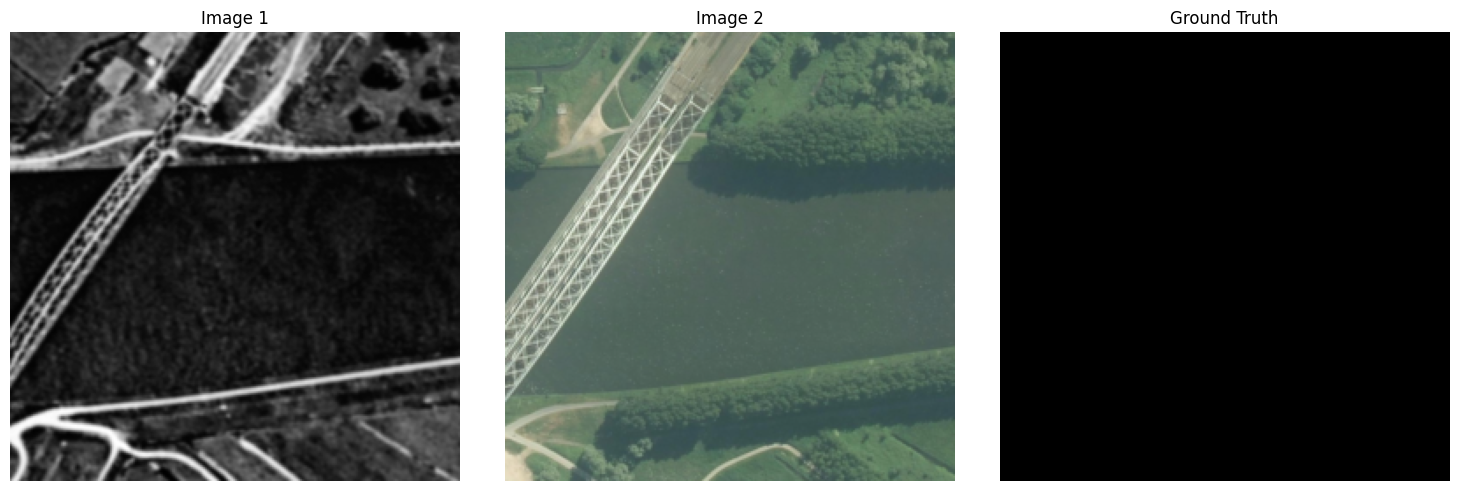

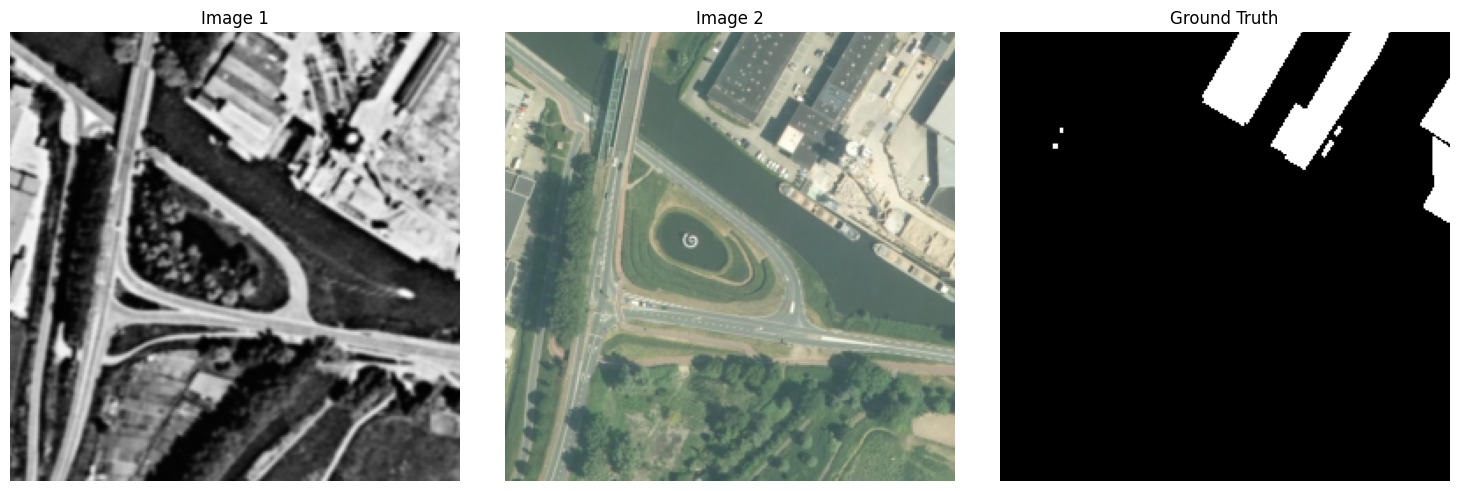

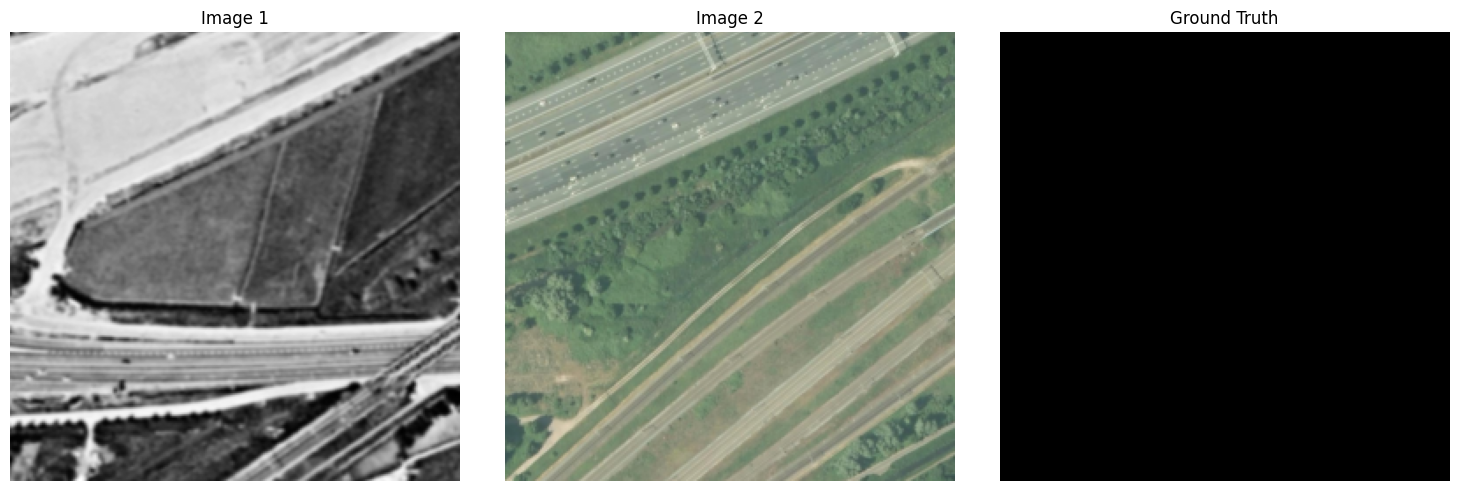

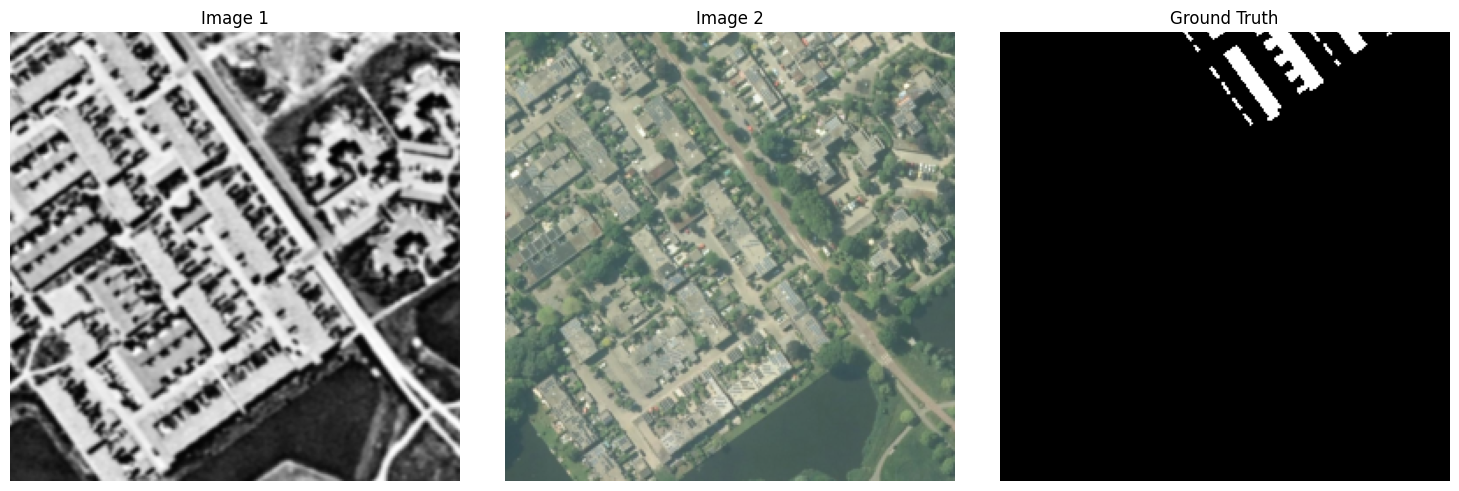

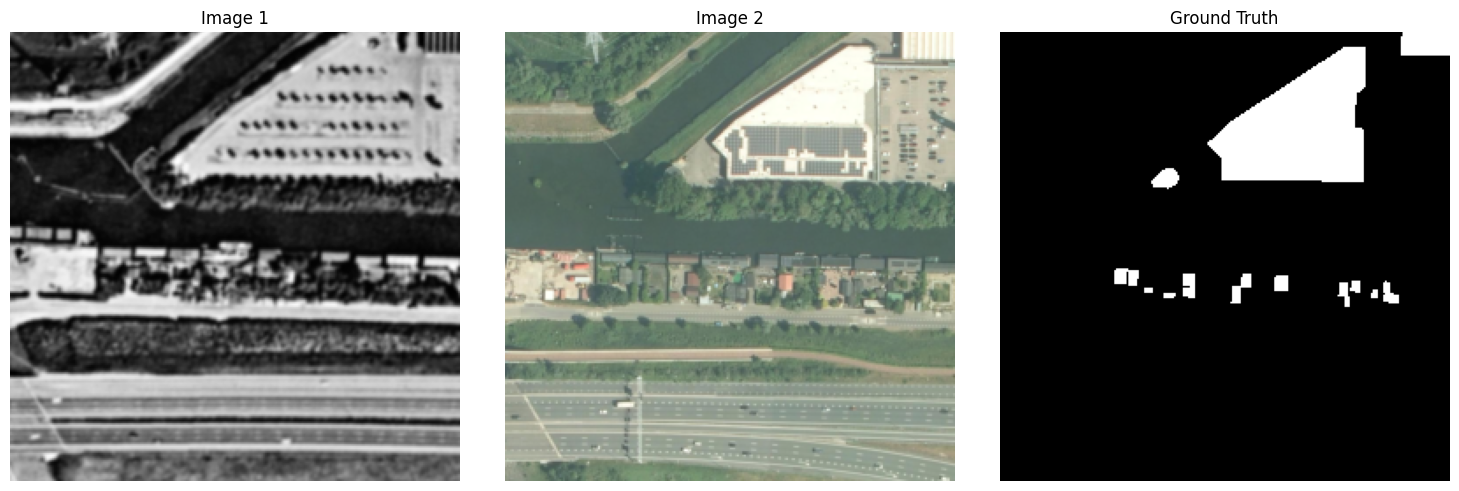

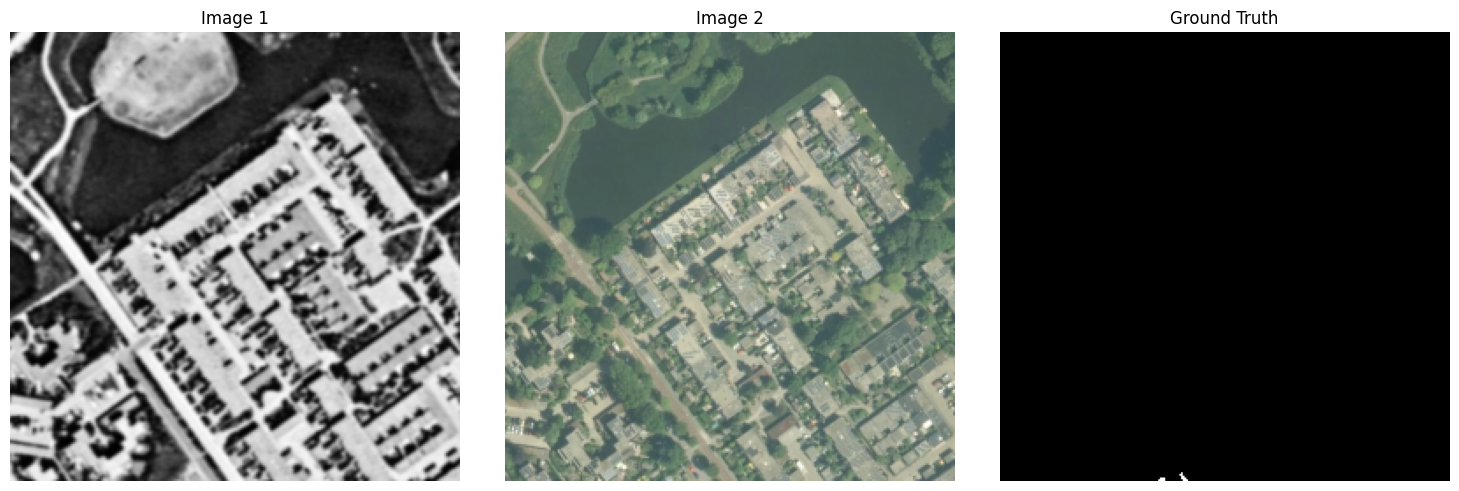

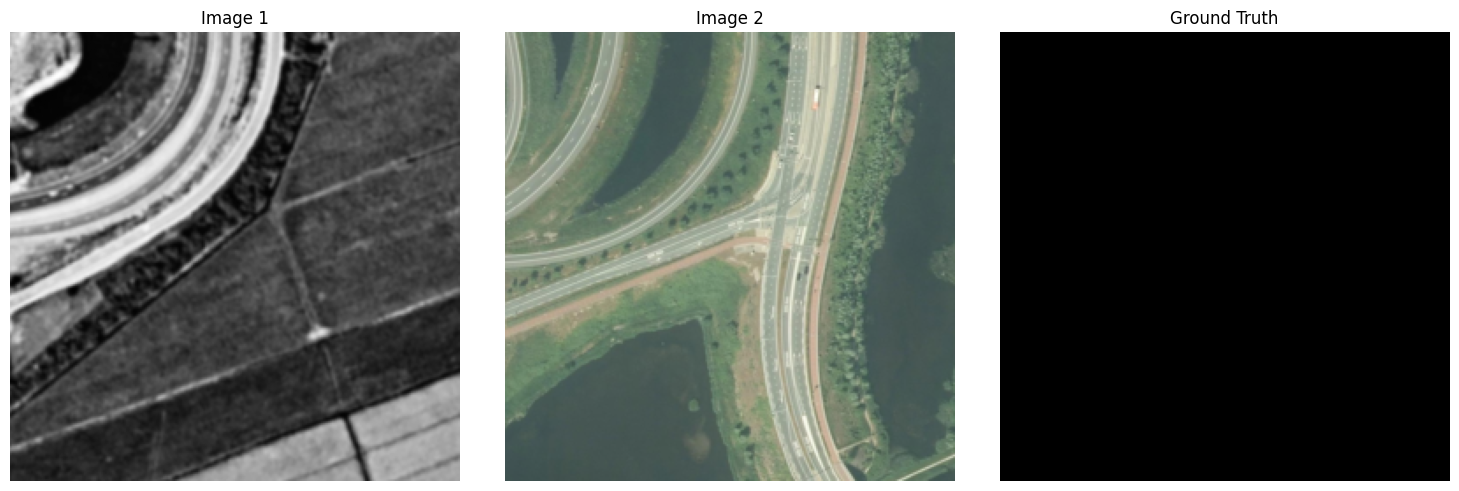

In [8]:
for sample in samples:
    plot(sample)